In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
vec = pd.read_csv('../data/temp/pca.eigenvec', header = None, sep = " ")
vec = vec.loc[:, 1:3].set_index(1)
vec.head()

,2,3
1,,
HG00096_HG00096,-0.011104,0.026589
HG00097_HG00097,-0.011141,0.026530
HG00099_HG00099,-0.011447,0.026560
HG00100_HG00100,-0.010807,0.026615
HG00101_HG00101,-0.011052,0.026127


In [32]:
pd.read_csv('../out/out.csv', header = None, sep = " ").set_index(0).loc[:, :2]

,1,2
0,,
HG00096,-0.012330,-0.034504
HG00097,-0.015131,-0.025313
HG00099,-0.009927,-0.016640
HG00100,-0.010463,-0.031039
HG00101,-0.008708,-0.025978
HG00102,-0.009378,-0.021779
HG00103,-0.012070,-0.032512
HG00104,-0.012377,-0.019061
HG00105,-0.013083,-0.028162


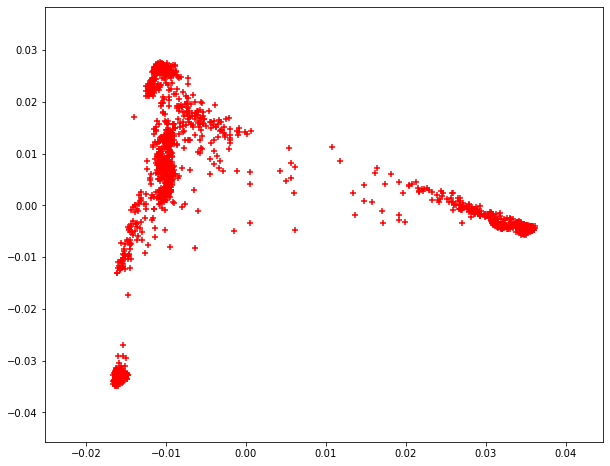

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(x = vec.loc[:, 2],
            y = vec.loc[:, 3], 
            color = 'r', 
            marker = '+')

plt.savefig('img_01.png')

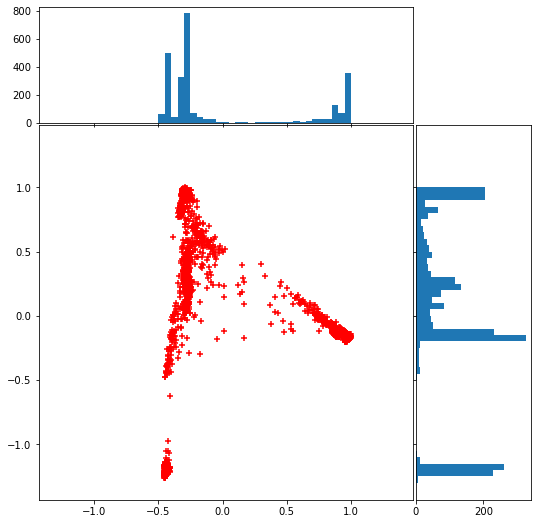

<Figure size 432x288 with 0 Axes>

In [7]:
x = vec.loc[:, 2] / np.max(vec.loc[:, 2])
y = vec.loc[:, 3] / np.max(vec.loc[:, 3])

    
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005
# functions borrowed from 
# https://matplotlib.org/3.2.0/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, color = 'r', marker = '+')

    # now determine nice limits by hand:
    binwidth = 0.05
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]


fig = plt.figure(figsize=(8, 8))

# plt.ylabel('2nd PC')
# plt.xlabel('1st PC')
# plt.title('2 principal components')



ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

    
plt.show()
plt.savefig('img_02.png')

In [8]:
from sklearn.cluster import OPTICS, KMeans, SpectralClustering


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:562: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


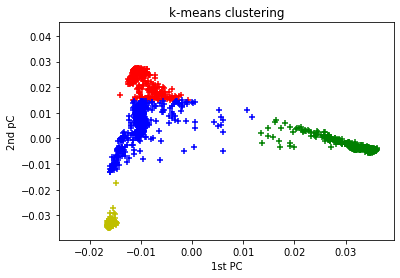

In [15]:
X = vec.loc[:, 2:4]
clustering = KMeans(n_clusters = 4).fit(X)


X.loc[:, 'label'] = clustering.labels_
color_lst = ['r', 'g', 'y', 'b', 'black']
for lab in set(clustering.labels_):
    x, y = X.loc[X.label == lab, 2], X.loc[X.label == lab, 3]
    plt.scatter(x, y, color = color_lst[lab], marker = '+')


plt.title('k-means clustering')
plt.xlabel('1st PC')
plt.ylabel('2nd pC')
plt.savefig('img_03.png')

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:562: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


r 537
g 657
y 515
black 839


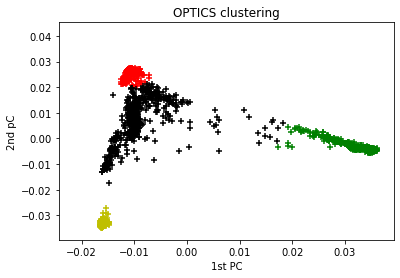

In [22]:
X = vec.loc[:, 2:4]

clustering = OPTICS(min_samples = 150).fit(X) # 100


X.loc[:, 'label'] = clustering.labels_
# color_lst = ['r', 'g', 'y', 'b', 'black']
color_lst = ['r', 'g', 'y', 'b', 'black']
for lab in set(clustering.labels_):
    print(color_lst[lab], (np.sum(X.label == lab)))
    x, y = X.loc[X.label == lab, 2], X.loc[X.label == lab, 3]
    plt.scatter(x, y, color = color_lst[lab], marker = '+')
    
    
plt.title('OPTICS clustering')
plt.xlabel('1st PC')
plt.ylabel('2nd pC')

plt.savefig('img_04.png')

In [11]:
len(set(clustering.labels_))


4

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:562: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


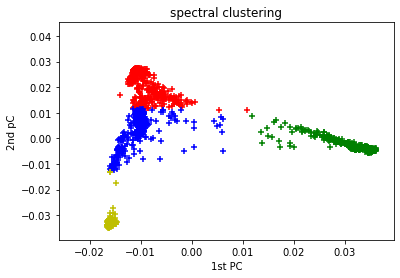

In [20]:
X = vec.loc[:, 2:4]

clustering = SpectralClustering(n_clusters= 4, 
                   assign_labels="discretize",
                   random_state=0).fit(X)

X.loc[:, 'label'] = clustering.labels_
# color_lst = ['r', 'g', 'y', 'b', 'black']
color_lst = ['r', 'b', 'y', 'g', 'black']
for lab in set(clustering.labels_):
    x, y = X.loc[X.label == lab, 2], X.loc[X.label == lab, 3]
    plt.scatter(x, y, color = color_lst[lab], marker = '+')
    
    
plt.title('spectral clustering')
plt.xlabel('1st PC')
plt.ylabel('2nd pC')

plt.savefig('img_05.png')